<a href="https://colab.research.google.com/github/hrbolek/learning/blob/master/experiments/proportionalnavigation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (9,6)

In [0]:
targetVelocity = [1, 0]
targetPosition = [1, 10]
targetState = [*targetVelocity, *targetPosition]

rocketVelocity = [0, 2]
rocketPosition = [0, 0]
rocketState = [*rocketVelocity, *rocketPosition]

In [0]:
def plotThem(*points):
  ax = plt.axes()
  opt = {'head_width': 0.4, 'head_length': 0.4, 'width': 0.2,
        'length_includes_head': True}
  #ax.set_aspect('equal')
  for point in points:
    position = point[2:]
    velocity = point[:2]
    ax.plot([position[0], position[0] + velocity[0]], [position[1], position[1] + velocity[1]])
    ax.arrow(position[0], position[1], velocity[0], velocity[1], head_width=0.125)#, head_length=0.125)#, fc='r', ec='k')
    #ax.arrow(position[0], position[1], velocity[0], velocity[1], fc='r', **opt)
    #ax.arrow(position[0], position[1], velocity[0], velocity[1], head_width=0.05, head_length=0.1, fc='k', ec='k')

    #ax.arrow(0, 0, 1.5, 1.5, head_width=0.05, head_length=0.1, fc='k', ec='k')
    #ax.quiver(position[0], position[1], velocity[0], velocity[1])#, scale=1)
    #print(position[0], position[1], velocity[0], velocity[1])
  return ax



[1, 0, 1, 10]
[0, 2, 0, 0]


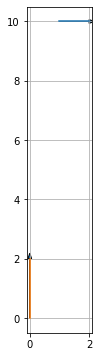

In [165]:
from math import sqrt
def calculateStateDerivation(rocket, target):
    currentPosition = rocket[2:]
    currentVelocity = rocket[:2]
    currentVelocityAbs = sqrt(currentVelocity[0] * currentVelocity[0] + currentVelocity[1] * currentVelocity[1])
    currentVelocityDirection = [currentVelocity[0] / currentVelocityAbs, currentVelocity[1] / currentVelocityAbs]

    targetPosition = target[2:]
    targetVelocity  = target[:2]
    targetVelocityEscapeAbs = targetVelocity[0] * currentVelocityDirection[0] + targetVelocity[1] * currentVelocityDirection[1]
    targetVelocityEscape = [targetVelocityEscapeAbs * currentVelocityDirection[0] + targetVelocityEscapeAbs * currentVelocityDirection[1]]
    targetVelocityManeuver = [targetVelocity[0] - targetVelocityEscape[0], targetVelocity[1] - targetVelocityEscape[1]]
    targetVelocityManeuverAbs = sqrt(targetVelocityManeuver[0] * targetVelocityManeuver[0] + targetVelocityManeuver[1] * targetVelocityManeuver[1])

    positionR = [targetPosition[0] - currentPosition[0], targetPosition[1] - currentPosition[1]]
    velocityR = [targetVelocity[0] - currentVelocity[0], targetVelocity[1] - currentVelocity[1]]
    positionRAbs = np.linalg.norm(positionR) # abs of vector
    velocityRAbs = np.linalg.norm(velocityR) # abs of vector

    omega = targetVelocityManeuverAbs / positionRAbs

    neededAcceleration = -n * velocityRAbs / currentVelocityAbs * \
      np.cross(currentVelocity, omega)
    result = [*neededAcceleration, *currentVelocity]

print(targetState)
print(rocketState)
ax = plotThem(targetState, rocketState)
ax.set_aspect('equal')
plt.grid(which='both')

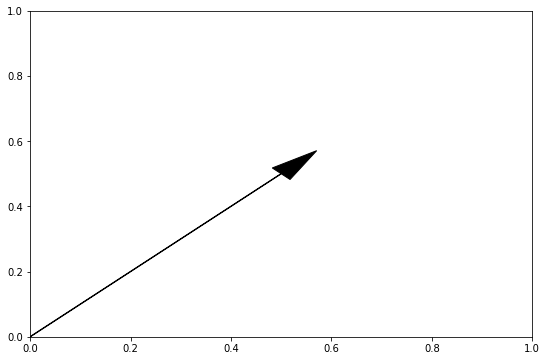

In [166]:
ax = plt.axes()
ax.arrow(0, 0, 0.5, 0.5, head_width=0.05, head_length=0.1, fc='k', ec='k')
plt.show()

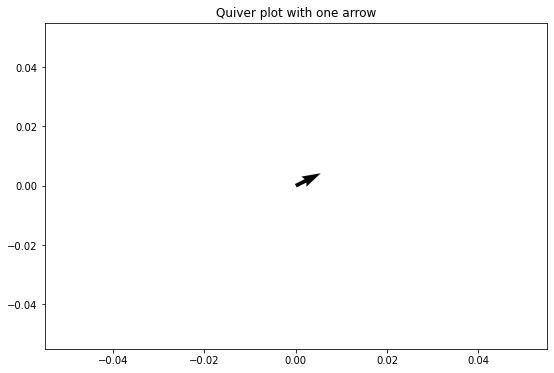

In [167]:
fig, ax = plt.subplots()

x_pos = 0
y_pos = 0
x_direct = 2
y_direct = 1

ax.quiver(x_pos, y_pos, x_direct, y_direct)
ax.set_title('Quiver plot with one arrow')

plt.show()
